# Predicting Wages 2
In this segment, we discuss the quality of prediction that the modern methods provide.

We begin by recalling that the best prediction rule for outcome Y using features/regressors Z is the function g(Z), equal to the conditional expectation of Y using Z.

g(Z) =E(Y|Z).

Modern Regression Methods, namely Lasso, Random Forest,Boosted Trees, Neural Networks, when appropriately tuned and under some regularity conditions, provide estimated prediction rules ^g(Z) that approximate the best prediction rule g(Z).

Theoretical work demonstrates that under appropriate regularity conditions and with appropriate choices of tuning parameters, the mean squared approximation error can be small once the sample size n is sufficiently large, namely,

E$_Z$(gˆ(Z) − g(Z)) → 0, as n → ∞,

where E$_Z$ denotes the expectation taken over Z , holding everything else fixed.

These results do rely on various structured assumptions, such as sparsity in the case of Lasso, and others, to deliver these guarantees in modern high-dimensional settings, where the number of features is large.

Under these conditions we expect that the sample MSE and R$^2$ would agree with the out-of-sample MSE and R$^2$.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
train = pd.read_csv('wage2015_train.csv')
test = pd.read_csv('wage2015_test.csv')
display(bbtrain.head(), test.head())

,wage,lwage,sex,white,black,hisp,shs,hsg,scl,clg,...,health,age,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,11.639676,2.454420,0,1,0,0,0,0,1,0,...,1,62,40.0,16.00,64.000,256.0000,4620.0,15,8290.0,18
1,26.442308,3.274965,0,1,0,0,0,0,0,1,...,1,23,0.0,0.00,0.000,0.0000,2300.0,8,8470.0,18
2,20.000000,2.995732,1,1,0,0,0,0,0,1,...,1,31,7.0,0.49,0.343,0.2401,2720.0,9,8590.0,19
3,26.442308,3.274965,1,1,0,0,0,0,0,1,...,0,31,7.0,0.49,0.343,0.2401,5300.0,17,8660.0,20
4,25.480769,3.237924,0,1,0,0,0,0,0,1,...,1,28,4.0,0.16,0.064,0.0256,40.0,1,7470.0,14


,wage,lwage,sex,white,black,hisp,shs,hsg,scl,clg,...,health,age,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,9.615385,2.263364,0,1,0,0,0,0,0,1,...,1,31,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,11.538462,2.445686,1,1,0,0,0,0,1,0,...,1,35,13.0,1.69,2.197,2.8561,6050.0,18,170.0,1
2,28.846154,3.361977,0,1,0,0,0,0,0,1,...,0,46,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
3,19.230769,2.956512,1,1,0,0,0,1,0,0,...,1,57,37.0,13.69,50.653,187.4161,5240.0,17,5680.0,9
4,11.500000,2.442347,1,1,0,0,0,1,0,0,...,0,23,3.0,0.09,0.027,0.0081,8740.0,21,7790.0,16


In [3]:
# dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6348 entries, 0 to 6347
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      6348 non-null   float64
 1   lwage     6348 non-null   float64
 2   sex       6348 non-null   int64  
 3   white     6348 non-null   int64  
 4   black     6348 non-null   int64  
 5   hisp      6348 non-null   int64  
 6   shs       6348 non-null   int64  
 7   hsg       6348 non-null   int64  
 8   scl       6348 non-null   int64  
 9   clg       6348 non-null   int64  
 10  mw        6348 non-null   int64  
 11  so        6348 non-null   int64  
 12  we        6348 non-null   int64  
 13  union     6348 non-null   int64  
 14  vet       6348 non-null   int64  
 15  cent      6348 non-null   int64  
 16  ncent     6348 non-null   int64  
 17  fam1      6348 non-null   int64  
 18  fam2      6348 non-null   int64  
 19  fam3      6348 non-null   int64  
 20  child     6348 non-null   int6

- The dataset has 6348 observations and 37 columns
- There are no nulls in the dataset

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,6348.0,18.151370,10.390258,0.015385,10.576923,15.384615,23.367102,57.692308
lwage,6348.0,2.735925,0.602504,-4.174387,2.358675,2.733368,3.151328,4.055124
sex,6348.0,0.541115,0.498346,0.000000,0.000000,1.000000,1.000000,1.000000
white,6348.0,0.697385,0.459426,0.000000,0.000000,1.000000,1.000000,1.000000
black,6348.0,0.184625,0.388024,0.000000,0.000000,0.000000,0.000000,1.000000
hisp,6348.0,0.225425,0.417895,0.000000,0.000000,0.000000,0.000000,1.000000
shs,6348.0,0.062697,0.242436,0.000000,0.000000,0.000000,0.000000,1.000000
hsg,6348.0,0.307656,0.461560,0.000000,0.000000,0.000000,1.000000,1.000000
scl,6348.0,0.299779,0.458197,0.000000,0.000000,0.000000,1.000000,1.000000
clg,6348.0,0.239918,0.427067,0.000000,0.000000,0.000000,0.000000,1.000000


- The average wage is close to 18 dolars, having the highest of 57 and the lowest as 0.015 dolars
- The average wage is about 18 dollars while the highest wage is 58 and lowest is 0.015385.
- Average age is 34 years, while min and max are from 16 to 40 years, which shows the data is diverse and is taken from different age groups. 
- Average experience is 12 years, while min and max from 0 to 65 years, which shows the data is diverse and is taken from different experience groups. 

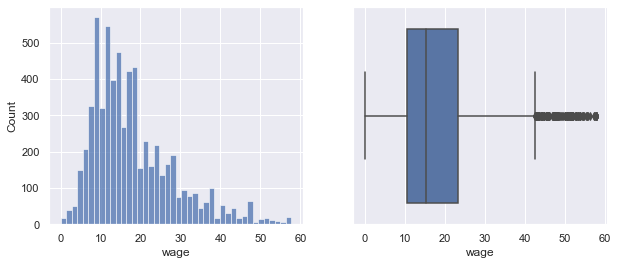

In [6]:
fig = plt.figure(figsize=(10,4))

# subplot 1
plt.subplot(121)
sns.histplot(x='wage', data=train)

# subplot 2
plt.subplot(122)
sns.boxplot(x='wage', data=train)

plt.show()

- This is the plot of the target variable which is the log of wage. The variable is right-skewed. There are outliers in the wage, which makes sense also, as some people have high wages as compared to others. The variable needs to be log-transformed to reduce the skewness for modeling.

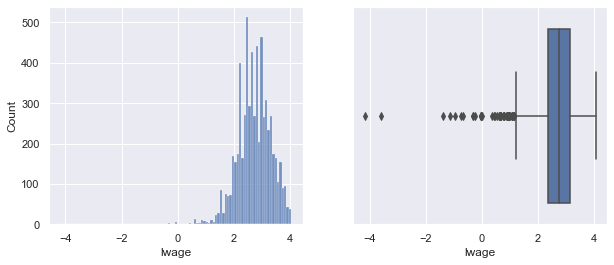

In [15]:
fig = plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(x='lwage', data=train)

plt.subplot(122)
sns.boxplot(x='lwage', data=train)

plt.show()

- After log transformation, the wage variable follows normal distribution but is a little left-skewed and we have outliers here.

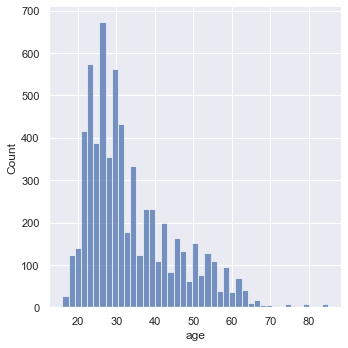

In [16]:
sns.displot(x='age', data=train)
plt.show()

- From the plot we can see that the data is collected from different age groups. Mostly we have data collected from 20-30 years old people.The number of people tends to decrease as age increases one reason may be as never married will be less as the age increases.

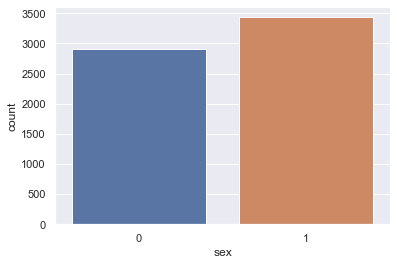

In [20]:
sns.countplot(x='sex',data=train)
plt.show()

- Our data seems pretty balanced in case of gender which is good.

As now we have done our analysis, lets move to Modeling.

In [29]:
# Linear Control Variables. Use This Control Variables for Tree Based Machine Learning Methods.
x_col = ["sex","white","black","hisp","shs","hsg","scl","clg","mw","so","we","union","vet","cent","ncent","fam1","fam2","fam3","child","fborn","cit","school","pens","fsize10","fsize100","health","age","exp1","occ2","ind2"]
# Quadratic Control Variables(Flexible Specification). Use This Control Variables for Linear methods
xL_col = ["sex","white","black","hisp","shs","hsg","scl","clg","mw","so","we","union","vet","cent","ncent","fam1","fam2","fam3","child","fborn","cit","school","pens","fsize10","fsize100","health","age","exp1","exp2","exp3","exp4","occ2","ind2"]

Regardless of the theoretical assumptions, we can measure out-of-sample performance directly by performing data splitting, as we did in the classical setting. 

Recall that,
1. We use a random part of data for estimating/training the prediction rule,
2. We use the other part to evaluate the quality of the prediction rule, recording out-of-sample mean squared error (can also look at R$^2$).

Recall that the part of the data used for estimation is called training sample.The part of the data used for evaluation is called the testing or validation sample

Indeed, suppose we use n observations for training and m for testing or validation. Let capital V denote the indices of the observations in the test sample.

Then the out-of-sample or test Mean Squared Error is defined as the average squared prediction error where we predict Y$_k$ in the test sample by gˆ(Z$_k$), where the prediction rule gˆ was computed on the training sample.

The out of sample R$^2$ is defined accordingly as 1 minus the ratio of the test MSE to the variation of the outcome in the test sample.


Here we illustrate the ideas using a data set of 12697 observations from the March Current Population Survey Supplement 2015.

In this dataset,the outcome observations Yi’s are log wage of never-married workers living in the U.S; and the features Zi’s consist of a variety of worker characteristics, including experience, race, education, 23 industry and 22 occupation indicators, and some other characteristics.

In [30]:
X_train = train[x_col]
X_test = test[x_col]

In [31]:
# outcome variable log wage
y_train = train['lwage']
y_test = test['lwage']

We will estimate the two sets of prediction rules: Linear and Nonlinear Models. In linear models, where we estimate 
the
gˆ(Z) = βˆ$^r$ X , we generate X in two ways:

› in a basic model, X consists of 72 raw regressors Z and a constant;

› in a flexible model, X consists of Z , four polynomials in experience, and all two-way interactions of these variables; this gives us 2336 regressors;

We estimate βˆ by linear regression/least squares and by penalized regression methods: Lasso, Cross-Validated Lasso, Ridge, and Elastic Nets.

In [32]:
# preparing the quadratic large specification data for train and test
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
XL_train = train[xL_col]
XL_test = test[xL_col]
XL_train_poly = poly.fit_transform(XL_train)
XL_train_poly = pd.DataFrame(XL_train_poly,columns= poly.get_feature_names(XL_train.columns))
XL_test_poly = poly.transform(XL_test)
XL_test_poly = pd.DataFrame(XL_test_poly,columns= poly.get_feature_names(XL_test.columns))

In [33]:
from sklearn.linear_model import LinearRegression
# Linear Model: Quadratic (Large) Specification without intercept
model_train_L = LinearRegression(fit_intercept=False)
model_train_L.fit(XL_train,y_train)
model_test_L = LinearRegression(fit_intercept=False)
model_test_L.fit(XL_test,y_test)


# Linear Model: Linear Specification without intercept
model_train = LinearRegression(fit_intercept=False)
model_train.fit(X_train,y_train)
model_test = LinearRegression(fit_intercept=False)
model_test.fit(X_test,y_test)

LinearRegression(fit_intercept=False)

In [34]:
# Linear Model: Linear Specification with intercept
model_lm = LinearRegression()
model_lm.fit(X_train,y_train)

# Linear Model: Quadratic (Large) Specification with intercept
model_lm2 = LinearRegression()
model_lm2.fit(XL_train,y_train)

LinearRegression()

In [35]:
from sklearn.linear_model import Lasso, LassoCV, RidgeCV, ElasticNetCV
# basic lasso model on original data
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)

# lassocv model on original data
model_lasso_cv = LassoCV(alphas=[1],cv = 11,n_jobs = -1) # cv - number of cross validations to be checked, n_jobs = -1 - use all the parallel processing power of the system
model_lasso_cv.fit(X_train,y_train)

#ridgecv model on original data
model_ridge_cv = RidgeCV(alphas=[0],cv = 11)
model_ridge_cv.fit(X_train,y_train)

#elasticnetcv model on original data
model_elasticnet_cv = ElasticNetCV(alphas=[0.5],cv = 11,n_jobs = -1)
model_elasticnet_cv.fit(X_train,y_train)

ElasticNetCV(alphas=[0.5], cv=11, n_jobs=-1)

In [36]:
# basic lasso model on quadratic transform data
model_lasso_L = Lasso()
model_lasso_L.fit(XL_train,y_train)

# lasso cv model on quadratic transform data
model_lasso_cv_L = LassoCV(alphas=[1],cv = 11,n_jobs = -1)
model_lasso_cv_L.fit(XL_train,y_train)

# ridge cv model on quadratic transform data
model_ridge_cv_L = RidgeCV(alphas=[0],cv = 11)
model_ridge_cv_L.fit(XL_train,y_train)

# elasticnet cv model on quadratic transform data
model_elasticnet_cv_L = ElasticNetCV(alphas=[0.5],cv = 11,n_jobs = -1)
model_elasticnet_cv_L.fit(XL_train,y_train)

ElasticNetCV(alphas=[0.5], cv=11, n_jobs=-1)

In nonlinear models, we estimate the prediction rule of the form gˆ(Z).

We estimate them by Random Forest, Regression Trees and Boosted Trees.

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# random forest regresison on original data

rf = RandomForestRegressor(n_estimators=2000,min_samples_leaf=5) # n_estimators - The number of trees in the forest, min_samples_leaf - The minimum number of samples required to be at a leaf node.
rf.fit(X_train,y_train)

# gradient boost regresison on original data
gbr = GradientBoostingRegressor(n_estimators=1000,min_weight_fraction_leaf=0.5,max_depth=2,learning_rate=0.01)
# max_depth - The maximum depth of the tree
# min_weight_fraction_leaf - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node

gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2,
                          min_weight_fraction_leaf=0.5, n_estimators=1000)

In [38]:
from sklearn.tree import DecisionTreeRegressor
# decision tree regresison on original data
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pruned = DecisionTreeRegressor(max_depth=5)
dt_pruned.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [39]:
# predictions on test data for all the models build so far
y_pred_lm = model_lm.predict(X_test)
y_pred_lm2 = model_lm2.predict(XL_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_lasso_cv = model_lasso_cv.predict(X_test)
y_pred_ridge_cv = model_ridge_cv.predict(X_test)
y_pred_elasticnet_cv = model_elasticnet_cv.predict(X_test)
y_pred_lasso_L = model_lasso_L.predict(XL_test)
y_pred_lasso_cv_L = model_lasso_cv_L.predict(XL_test)
y_pred_ridge_cv_L = model_ridge_cv_L.predict(XL_test)
y_pred_elasticnet_cv_L = model_elasticnet_cv_L.predict(XL_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_dt_pruned = dt_pruned.predict(X_test)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
# linear model metrics
lm_r2 = r2_score(y_test,y_pred_lm)
lm_mse = mean_squared_error(y_test,y_pred_lm)
print("lm_r2",lm_r2)
print("lm_mse",lm_mse)
print()

# quadratic model metrics
lm2_r2 = r2_score(y_test,y_pred_lm2)
lm2_mse = mean_squared_error(y_test,y_pred_lm2)
print("lm2_r2",lm2_r2)
print("lm2_mse",lm2_mse)
print()

# lasso model metrics
lasso_r2 = r2_score(y_test,y_pred_lasso)
lasso_mse = mean_squared_error(y_test,y_pred_lasso)
print("lasso_r2",lasso_r2)
print("lasso_mse",lasso_mse)
print()

# lassocv model metrics
lasso_cv_r2 = r2_score(y_test,y_pred_lasso_cv)
lasso_cv_mse = mean_squared_error(y_test,y_pred_lasso_cv)
print("lasso_cv_r2",lasso_cv_r2)
print("lasso_cv_mse",lasso_cv_mse)
print()

# ridgecv model metrics
ridge_cv_r2 = r2_score(y_test,y_pred_ridge_cv)
ridge_cv_mse = mean_squared_error(y_test,y_pred_ridge_cv)
print("ridge_cv_r2",ridge_cv_r2)
print("ridge_cv_mse",ridge_cv_mse)
print()

# elasticnetcv model metrics
elasticnet_cv_r2 = r2_score(y_test,y_pred_elasticnet_cv)
elasticnet_cv_mse = mean_squared_error(y_test,y_pred_elasticnet_cv)
print("elasticnet_cv_r2",elasticnet_cv_r2)
print("elasticnet_cv_mse",elasticnet_cv_mse)
print()

# lasso on quadratic data metrics
lasso_L_r2 = r2_score(y_test,y_pred_lasso_L)
lasso_L_mse = mean_squared_error(y_test,y_pred_lasso_L)
print("lasso_L_r2",lasso_L_r2)
print("lasso_L_mse",lasso_L_mse)
print()

# lassocv on quadratic data metrics
lasso_cv_L_r2 = r2_score(y_test,y_pred_lasso_cv_L)
lasso_cv_L_mse = mean_squared_error(y_test,y_pred_lasso_cv_L)
print("lasso_cv_L_r2",lasso_cv_L_r2)
print("lasso_cv_L_mse",lasso_cv_L_mse)
print()

# ridgecv on quadratic data metrics
ridge_cv_L_r2 = r2_score(y_test,y_pred_ridge_cv_L)
ridge_cv_L_mse = mean_squared_error(y_test,y_pred_ridge_cv_L)
print("ridge_cv_L_r2",ridge_cv_L_r2)
print("ridge_cv_L_mse",ridge_cv_L_mse)
print()

# elasticnetcv on quadratic data metrics
elasticnet_cv_L_r2 = r2_score(y_test,y_pred_elasticnet_cv_L)
elasticnet_cv_L_mse = mean_squared_error(y_test,y_pred_elasticnet_cv_L)
print("elasticnet_cv_L_r2",elasticnet_cv_L_r2)
print("elasticnet_cv_L_mse",elasticnet_cv_L_mse)
print()

# randomforest model metrics
rf_r2 = r2_score(y_test,y_pred_rf)
rf_mse = mean_squared_error(y_test,y_pred_rf)
print("rf_r2",rf_r2)
print("rf_mse",rf_mse)
print()

# gradientboost model metrics
gbr_r2 = r2_score(y_test,y_pred_gbr)
gbr_mse = mean_squared_error(y_test,y_pred_gbr)
print("gbr_r2",gbr_r2)
print("gbr_mse",gbr_mse)
print()

# decision tree model metrics
dt_r2 = r2_score(y_test,y_pred_dt)
dt_mse = mean_squared_error(y_test,y_pred_dt)
print("dt_r2",dt_r2)
print("dt_mse",dt_mse)
print()

# pruned decision tree model metrics
dt_pruned_r2 = r2_score(y_test,y_pred_dt_pruned)
dt_pruned_mse = mean_squared_error(y_test,y_pred_dt_pruned)
print("dt_pruned_r2",dt_pruned_r2)
print("dt_pruned_mse",dt_pruned_mse)

lm_r2 0.2564591769934087
lm_mse 0.31276644998971176

lm2_r2 0.2602708126287935
lm2_mse 0.3111631059506946

lasso_r2 0.04811131393532886
lasso_mse 0.4004068585258824

lasso_cv_r2 0.04811131393532886
lasso_cv_mse 0.4004068585258824

ridge_cv_r2 0.2564591769934089
ridge_cv_mse 0.3127664499897117

elasticnet_cv_r2 0.11137542178631388
elasticnet_cv_mse 0.3737951516604701

lasso_L_r2 0.04811131393532886
lasso_L_mse 0.4004068585258824

lasso_cv_L_r2 0.04811131393532886
lasso_cv_L_mse 0.4004068585258824

ridge_cv_L_r2 0.26027081262879304
ridge_cv_L_mse 0.31116310595069474

elasticnet_cv_L_r2 0.12063635718219512
elasticnet_cv_L_mse 0.36989958897214126

rf_r2 0.2873213668204949
rf_mse 0.29978443575128066

gbr_r2 -0.0002358120438648026
gbr_mse 0.420743817159267

dt_r2 -0.2841042989698259
dt_mse 0.5401515701334393

dt_pruned_r2 0.217220362312872
dt_pruned_mse 0.3292720464407715


## Conclusion

- The above result shows the results for a single split of data into the training and testing part. We see that the prediction rule produced by Random Forest performs the best here, giving the lowest testing MSE or highest R-squared.

- Other methods,for example,quadratic model, Cross-Validated Ridge, Pruned regression tree, perform nearly as well.

- **Remarkably** , OLS on a simple model with 72 regressors performs extremely well, almost as well as the sophisticated version of Random Forest.
- Since the performance of OLS on a simple model is statistically indistinguishable from that of Random Forest, we may choose this method to be the winner here as OLS method is more interpretable than random forest and using the coefficient of variables in the OLS method we can select the more important features with valid reasons.